## 2. Normalização e Dimensionalidade dos Embeddings

### 2.1 Normalização de Vetores

**Por que normalizar embeddings?**
A normalização é crucial em embeddings porque:
- **Elimina bias de magnitude**: Vetores com valores absolutos maiores não dominam o cálculo de similaridade
- **Melhora performance**: Algoritmos convergem mais rapidamente
- **Padroniza escalas**: Diferentes features ficam na mesma escala
- **Facilita comparações**: Similaridade cosseno se torna mais interpretável

In [1]:
import numpy as np
from sklearn.preprocessing import normalize

class EmbeddingNormalizer:
    @staticmethod
    def l2_normalize(embedding):
        """
        Normalização L2 (norma euclidiana)
        
        Fórmula: x_norm = x / ||x||₂
        
        - Transforma o vetor para ter norma (magnitude) = 1
        - Preserva a direção do vetor original
        - Ideal para cálculo de similaridade cosseno
        - Mais comum em embeddings de texto
        """
        return embedding / np.linalg.norm(embedding)
    
    @staticmethod
    def min_max_normalize(embedding):
        """
        Normalização Min-Max
        
        Fórmula: x_norm = (x - min(x)) / (max(x) - min(x))
        
        - Escala valores para o intervalo [0, 1]
        - Preserva a distribuição original dos dados
        - Sensível a outliers
        - Útil quando você conhece os limites dos dados
        """
        return (embedding - embedding.min()) / (embedding.max() - embedding.min())
    
    @staticmethod
    def z_score_normalize(embedding):
        """
        Normalização Z-Score (Standardização)
        
        Fórmula: x_norm = (x - μ) / σ
        
        - Centraliza dados em média = 0, desvio padrão = 1
        - Assume distribuição normal dos dados
        - Robusta a outliers moderados
        - Preserva a forma da distribuição original
        """
        return (embedding - embedding.mean()) / embedding.std()

# Exemplo prático com interpretação educacional
embedding_raw = np.array([1.5, -0.8, 2.3, -1.2, 0.9])
normalizer = EmbeddingNormalizer()

embedding_l2 = normalizer.l2_normalize(embedding_raw)
embedding_minmax = normalizer.min_max_normalize(embedding_raw)
embedding_zscore = normalizer.z_score_normalize(embedding_raw)

print("=== COMPARAÇÃO DE TÉCNICAS DE NORMALIZAÇÃO ===")
print(f"Original: {embedding_raw}")
print(f"Norma original: {np.linalg.norm(embedding_raw):.3f}")
print()

print(f"L2 Normalizado: {embedding_l2}")
print(f"Nova norma: {np.linalg.norm(embedding_l2):.3f} (sempre = 1.0)")
print()

print(f"Min-Max Normalizado: {embedding_minmax}")
print(f"Min: {embedding_minmax.min():.3f}, Max: {embedding_minmax.max():.3f}")
print()

print(f"Z-Score Normalizado: {embedding_zscore}")
print(f"Média: {embedding_zscore.mean():.3f}, Std: {embedding_zscore.std():.3f}")

# Demonstração prática: impacto na similaridade cosseno
print("\n=== IMPACTO NA SIMILARIDADE COSSENO ===")
embedding_a = np.array([1.0, 2.0, 3.0])
embedding_b = np.array([10.0, 20.0, 30.0])  # Mesmo padrão, escala diferente

from sklearn.metrics.pairwise import cosine_similarity

# Sem normalização
sim_original = cosine_similarity([embedding_a], [embedding_b])[0][0]
print(f"Similaridade sem normalização: {sim_original:.3f}")

# Com normalização L2
a_norm = normalizer.l2_normalize(embedding_a)
b_norm = normalizer.l2_normalize(embedding_b)
sim_normalized = cosine_similarity([a_norm], [b_norm])[0][0]
print(f"Similaridade com normalização L2: {sim_normalized:.3f}")
print("✓ Vetores com mesmo padrão têm similaridade = 1.0 após normalização L2")

=== COMPARAÇÃO DE TÉCNICAS DE NORMALIZAÇÃO ===
Original: [ 1.5 -0.8  2.3 -1.2  0.9]
Norma original: 3.230

L2 Normalizado: [ 0.46446084 -0.24771245  0.71217329 -0.37156867  0.27867651]
Nova norma: 1.000 (sempre = 1.0)

Min-Max Normalizado: [0.77142857 0.11428571 1.         0.         0.6       ]
Min: 0.000, Max: 1.000

Z-Score Normalizado: [ 0.71665742 -1.00033432  1.31387194 -1.29894158  0.26874653]
Média: -0.000, Std: 1.000

=== IMPACTO NA SIMILARIDADE COSSENO ===
Similaridade sem normalização: 1.000
Similaridade com normalização L2: 1.000
✓ Vetores com mesmo padrão têm similaridade = 1.0 após normalização L2


### 2.2 Redução de Dimensionalidade

**Por que reduzir dimensionalidade?**
- **Visualização**: Impossível visualizar espaços com >3 dimensões
- **Performance**: Menos dimensões = processamento mais rápido
- **Armazenamento**: Reduz uso de memória
- **Curse of dimensionality**: Evita problemas em espaços de alta dimensão
- **Noise reduction**: Remove dimensões menos informativas

Dados originais: 30 amostras, 50 dimensões

=== REDUÇÃO COM PCA ===
PCA - Variância explicada por componente: [0.26104792 0.11971133]
Variância total preservada: 0.381

=== REDUÇÃO COM t-SNE ===


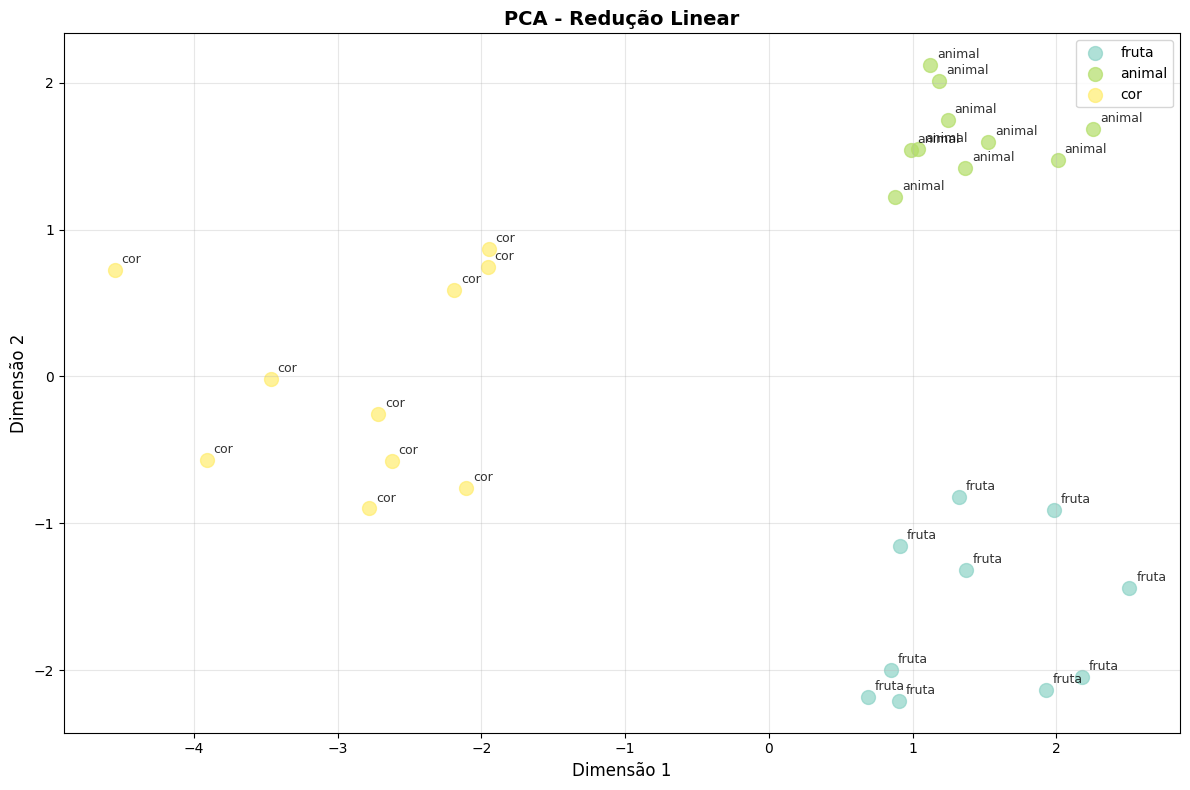

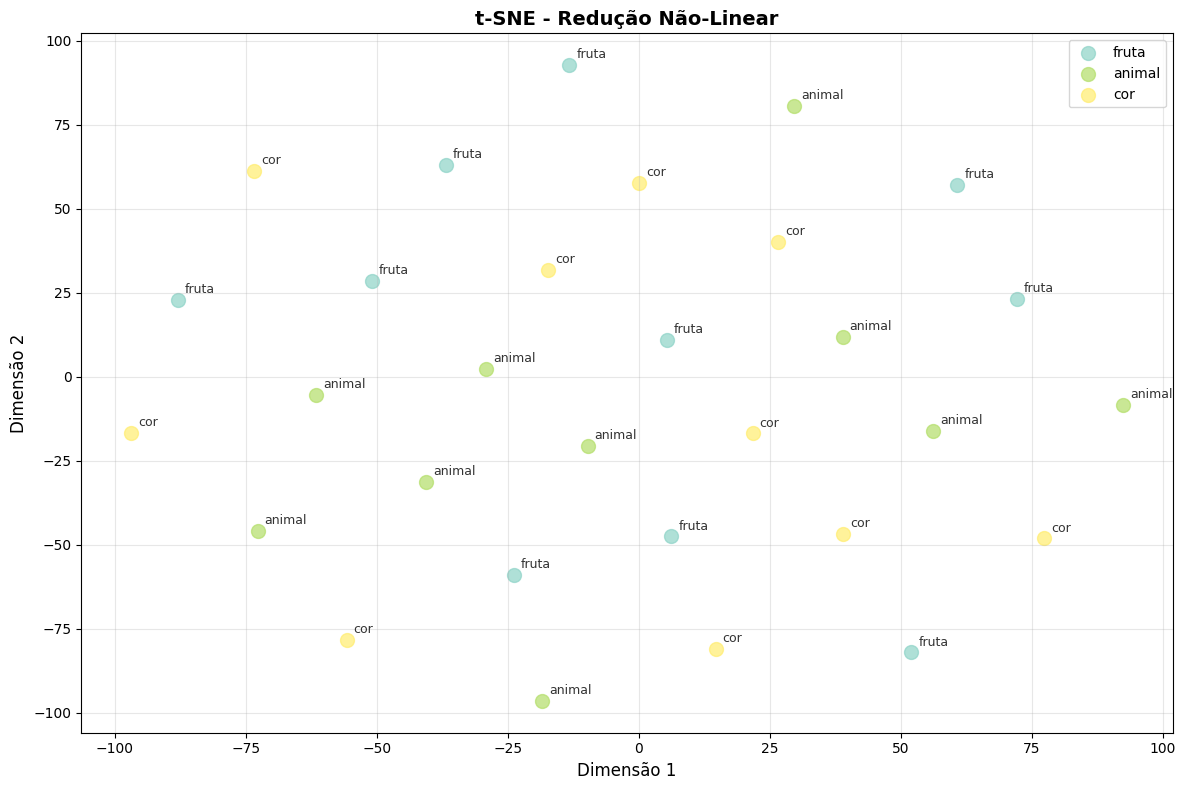


=== COMPARAÇÃO PCA vs t-SNE ===
PCA:
✓ Preserva variância global
✓ Resultados reproduzíveis
✓ Rápido para grandes datasets
✗ Assume relações lineares

t-SNE:
✓ Excelente para visualizar clusters
✓ Captura relações não-lineares
✓ Preserva estrutura local
✗ Distâncias globais não são confiáveis
✗ Lento para grandes datasets


In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

class DimensionalityReducer:
    def __init__(self):
        self.pca = None
        self.tsne = None
    
    def reduce_with_pca(self, embeddings, n_components=2):
        """
        Redução usando PCA (Principal Component Analysis)
        
        Características:
        - Linear: Encontra combinações lineares das features originais
        - Preserva variância: Mantém a maior variância possível
        - Determinístico: Sempre produz o mesmo resultado
        - Rápido: Computacionalmente eficiente
        - Interpretável: Componentes têm significado matemático claro
        
        Quando usar:
        - Dados com correlações lineares
        - Quando você precisa de resultados reproduzíveis
        - Para análise exploratória inicial
        """
        self.pca = PCA(n_components=n_components)
        reduced = self.pca.fit_transform(embeddings)
        
        # Informações educacionais
        explained_variance = self.pca.explained_variance_ratio_
        print(f"PCA - Variância explicada por componente: {explained_variance}")
        print(f"Variância total preservada: {sum(explained_variance):.3f}")
        
        return reduced
    
    def reduce_with_tsne(self, embeddings, n_components=2):
        """
        Redução usando t-SNE (t-Distributed Stochastic Neighbor Embedding)
        
        Características:
        - Não-linear: Captura relações complexas
        - Preserva vizinhança local: Pontos próximos ficam próximos
        - Estocástico: Resultados podem variar entre execuções
        - Lento: Computacionalmente intensivo
        - Excelente para visualização de clusters
        
        Quando usar:
        - Visualização de dados complexos
        - Identificação de clusters
        - Quando relações são não-lineares
        
        Cuidados:
        - Distâncias globais não são preservadas
        - Não use para análise quantitativa de distâncias
        """
        self.tsne = TSNE(n_components=n_components, random_state=42, 
                        perplexity=min(30, len(embeddings)-1))
        return self.tsne.fit_transform(embeddings)
    
    def plot_embeddings(self, embeddings_2d, labels=None, title="Visualização de Embeddings"):
        """
        Visualização dos embeddings reduzidos
        
        Parâmetros:
        - embeddings_2d: Array com embeddings reduzidos para 2D
        - labels: Labels opcionais para anotar pontos
        - title: Título do gráfico
        """
        plt.figure(figsize=(12, 8))
        
        # Colorir pontos se houver labels repetidos (clusters)
        if labels:
            unique_labels = list(set(labels))
            colors = plt.cm.Set3(np.linspace(0, 1, len(unique_labels)))
            
            for i, label in enumerate(unique_labels):
                mask = [l == label for l in labels]
                plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                          c=[colors[i]], label=label, alpha=0.7, s=100)
        else:
            plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], 
                       alpha=0.7, s=100, c='blue')
        
        # Anotar pontos
        if labels:
            for i, label in enumerate(labels):
                plt.annotate(label, (embeddings_2d[i, 0], embeddings_2d[i, 1]),
                           xytext=(5, 5), textcoords='offset points',
                           fontsize=9, alpha=0.8)
        
        plt.title(title, fontsize=14, fontweight='bold')
        plt.xlabel("Dimensão 1", fontsize=12)
        plt.ylabel("Dimensão 2", fontsize=12)
        plt.grid(True, alpha=0.3)
        
        if labels and len(set(labels)) > 1:
            plt.legend()
        
        plt.tight_layout()
        plt.show()

# Exemplo prático educacional
def exemplo_reducao_dimensionalidade():
    """Exemplo completo comparando PCA vs t-SNE"""
    
    # Criar dados de exemplo: embeddings de palavras relacionadas
    np.random.seed(42)
    
    # CORREÇÃO: Criar centros com 50 dimensões para cada categoria
    # Apenas as primeiras 3 dimensões são diferentes, o resto é zero
    centro_animais = np.zeros(50)
    centro_animais[:3] = [2, 1, 0]
    
    centro_frutas = np.zeros(50)
    centro_frutas[:3] = [-1, 2, 1]
    
    centro_cores = np.zeros(50)
    centro_cores[:3] = [0, -2, 2]
    
    # Gerar embeddings com ruído em torno dos centros
    animais = np.random.normal(centro_animais, 0.5, (10, 50))
    frutas = np.random.normal(centro_frutas, 0.5, (10, 50))
    cores = np.random.normal(centro_cores, 0.5, (10, 50))
    
    # Combinar dados
    embeddings = np.vstack([animais, frutas, cores])
    labels = (['animal'] * 10 + ['fruta'] * 10 + ['cor'] * 10)
    
    print(f"Dados originais: {embeddings.shape[0]} amostras, {embeddings.shape[1]} dimensões")
    
    # Inicializar redutor
    reducer = DimensionalityReducer()
    
    # Comparar PCA vs t-SNE
    print("\n=== REDUÇÃO COM PCA ===")
    embeddings_pca = reducer.reduce_with_pca(embeddings, n_components=2)
    
    print("\n=== REDUÇÃO COM t-SNE ===")
    embeddings_tsne = reducer.reduce_with_tsne(embeddings, n_components=2)
    
    # Visualizar resultados
    reducer.plot_embeddings(embeddings_pca, labels, "PCA - Redução Linear")
    reducer.plot_embeddings(embeddings_tsne, labels, "t-SNE - Redução Não-Linear")
    
    # Análise comparativa
    print("\n=== COMPARAÇÃO PCA vs t-SNE ===")
    print("PCA:")
    print("✓ Preserva variância global")
    print("✓ Resultados reproduzíveis")
    print("✓ Rápido para grandes datasets")
    print("✗ Assume relações lineares")
    
    print("\nt-SNE:")
    print("✓ Excelente para visualizar clusters")
    print("✓ Captura relações não-lineares")
    print("✓ Preserva estrutura local")
    print("✗ Distâncias globais não são confiáveis")
    print("✗ Lento para grandes datasets")

# Executar exemplo
exemplo_reducao_dimensionalidade()

### 🎓 **Pontos-chave:**

1. **Normalização é fundamental**: Sempre normalize embeddings antes de calcular similaridades
2. **L2 é padrão**: Para embeddings de texto, normalização L2 é quase sempre a melhor escolha
3. **PCA vs t-SNE**: PCA para análise quantitativa, t-SNE para visualização de clusters
4. **Interpretação cuidadosa**: t-SNE pode criar clusters visuais que não existem nos dados originais
5. **Experimentação**: Teste diferentes técnicas para encontrar a melhor para seus dados